## TODO

Look at dataset, list by size and pick top 100 

In [4]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot')
#ols models
import statsmodels.formula.api as sm
from patsy import dmatrices
import re
import scipy as sp
from tools import print_columns
import csv
import math

Possible screening rules 
- proximity to homeowner, need population per zip code in San Jose. Simple assume that just density per tile. One tile = one zip code. 
- offered savings, need to convert price per watt into savings 
- customer rating 
- 

For each in top 100 create customer rating  - scrape yelp  

pick 1 installer from narrowed down via screening rules, this installer is offering 1 project - compare to none option and pick it. Depends on the 

interaction - depends on the number of installed projects - goes by size
distribution of locations - from NEM


warranty - could not get distribution, assume basically it from bla and maybe from survey

total project time - ? need to think
will have from dataset some version of a time 


equipment technology - will have from dataset, but need to actually transform data - will need a lot of help. 
Alternative is assign by size with some distribution.

from panels on the market that are used by installers - get type of installer - panel efficiency, panel visibility

1 installer is offering 2? types of systems - look into actual data to see what types they are offering 

failures in first years - tie into inverter type. 
Assume basic failure rate. Check with actual data that might get from the survey. 
Question about amount of maintenance that need

Top 100 for each have Rating, InteractionType, EquipmentType, TotalProjectTime, Warranty

Generate 100 agents in Python with customization and import list of parameters into c++

Getting information from yelp 
https://github.com/codelucas/yelpcrawl/blob/master/crawler.py
https://www.yelp.com/search?start=0&cflt=solarinstallation&find_loc=94536&ns=1


Estimating costs for SEI
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.718.3427&rep=rep1&type=pdf
    

In [2]:
sei = {'EParamTypes::SEIRating':3.0, 
       'EParamTypes::SEIInteractionType':0.0,
       'EParamTypes::SEIEquipmentType':1.0, 
       'EParamTypes::SEILeadInProjectTime':10.0, 
       'EParamTypes::SEIWarranty':5*52}

In [3]:
seis = []
#create test sei 
for i in range(3):
    sei['EParamTypes::SEIRating'] = 3.0 + i
    seis.append(sei.copy())
    

In [4]:
with open('sei-params.json', 'w') as outfile:
    json.dump(seis, outfile)

Power optimizer producers
http://www.solaredge.com/us/products/power-optimizer#/
http://www.solaredge.com/sites/default/files/solaredge-reliability-methodology.pdf
https://www.energysage.com/solar/101/microinverter-power-optimizer-options

   
   

In [ ]:
#calculator for CO2
#https://www.epa.gov/energy/greenhouse-gas-equivalencies-calculator
    
    
1000 - 0.665

Estimates for failures
http://www1.eere.energy.gov/solar/pdfs/pvmrw2011_01_plen_degraaff.pdf  - number pessimistic of 4% failures at 15 years for one panel
file:///Users/wilfeli/ABM/SolarPanels/Readings/IEA-PVPS_T13-01_2014_Review_of_Failures_of_Photovoltaic_Modules_Final.pdf - 2% failure at 10 years

http://www.renewableenergyworld.com/articles/2009/09/mtbf-and-reliability-a-misunderstood-relationship-in-solar-pv.html - explanation of MTBF

http://pveducation.com/marketing-hype/micro-inverter-mtbf-marketing-hype/ - lower estimate of failures
http://www.appropedia.org/Lifespan_and_Reliability_of_Solar_Photovoltaics_-_Literature_Review#MTBF_-_PVm.2C_Mean_Time_Before_Failure_of_Photovoltaic_modules_.282003.29 - general lit review
    
  
 http://intigaia.free.fr/BDPV/Documents/rapporto%20finale%20-%20progetto%20eu%205fp%20-%20mean%20time%20before%20failure%20(mtbf)%202003.pdf
@article{realini2003mean,
title={Mean time before failure of photovoltaic modules},
author={Realini, Antonella}
} - general info





https://matter2energy.wordpress.com/2012/04/09/the-great-microinverter-debate/ - microinverters 


https://enphase.com/sites/default/files/Enphase-Warranty-US-CA.pdf - warranty for microinverters


https://us.sunpower.com/sites/sunpower/files/media-library/white-papers/wp-sunpower-module-degradation-rate.pdf - research into different failure rates


15 years - 0.04 failed

x = 15
f = 0.04
1-e(-lambda*x) = f
-e(-lambda*x) = f - 1
e(-lambda*x) = 1 - f
-lambda*x = log(1-f)
lambda = - log(1-f)/x


In [7]:
#from SumPower marketing
fail = 0.04
x = 15
theta_0 = -math.log(1-fail)/x
theta_0

0.0027214663013503445

In [27]:
#from longitudal study 
fail = 0.02
x = 10
theta_0 = -math.log(1-fail)/x
theta_0

0.0020202707317519466

In [28]:
1/theta_0

494.9831645250911

In [ ]:
Total system falure rate
#responsible for pv panels

#add inverters 


In [29]:
MTBF_micro = 300

In [30]:
theta_micro = 1/MTBF_micro

In [31]:
theta_micro

0.0033333333333333335

In [16]:
theta_system = theta_0*20 + theta_micro*20
1/theta_system

8.25791157705455

In [24]:
MTBF_string = 10

In [25]:
theta_string = 1/MTBF_string

In [26]:
theta_system = theta_0*20 +  theta_string
1/theta_system

6.475454019822103

In [32]:
#read data
df_full = pd.read_csv("../../Data/NEM_CurrentlyInterconnectedDataset_2016-06-30.csv", low_memory=False)
df_full.columns = df_full.columns.str.replace(' ','_')

In [34]:
#cheat sheet for column names
print_columns(df_full)

(0, 'Application_Id')
(1, 'Matched_CSI_Application_Number')
(2, 'Utility')
(3, 'Service_City')
(4, 'Service_Zip')
(5, 'Service_County')
(6, 'Technology_Type')
(7, 'System_Size_DC')
(8, 'System_Size_AC')
(9, 'Tilt')
(10, 'Azimuth')
(11, 'Mounting_Method')
(12, 'Tracking')
(13, 'Customer_Sector')
(14, 'App_Received_Date')
(15, 'App_Complete_Date')
(16, 'App_Approved_Date')
(17, 'Self_Installer')
(18, 'Installer_Name')
(19, 'Installer_Phone')
(20, 'Installer_City')
(21, 'Installer_State')
(22, 'Installer_Zip')
(23, 'Third_Party_Owned')
(24, 'Third_Party_Owned_Type')
(25, 'Third_Party_Name')
(26, 'Pace_Financed')
(27, 'Pace_Financier')
(28, 'Electric_Vehicle')
(29, 'Electric_Vehicle_Count')
(30, 'System_Output_Monitoring')
(31, 'System_Output_Reports_To_Vendor?')
(32, 'System_Output_Monitoring_Provider')
(33, 'Total_System_Cost')
(34, 'Itc_Cost_Basis')
(35, 'VNEM,_NEM-V,_NEM-Agg')
(36, 'Previous_Application')
(37, 'Previous_Application_Ids')
(38, 'NEM_Tariff')
(39, 'Application_Status')
(4

In [39]:
#get year from date
df_full.ix[:,'App_Complete_Date'] =  pd.to_datetime(df_full.ix[:,'App_Complete_Date'], infer_datetime_format=True)
df_full.ix[:,'App_Received_Date'] =  pd.to_datetime(df_full.ix[:,'App_Received_Date'], infer_datetime_format=True)
df_full.ix[:,'App_Approved_Date'] =  pd.to_datetime(df_full.ix[:,'App_Approved_Date'], infer_datetime_format=True)
df_full['App_Complete_Date_Year'] = df_full.ix[:,'App_Complete_Date'].dt.year
#clean a little bit
df_full = df_full[(df_full.T != 0).all()]

In [50]:
#keep cleaning
df = df_full[(df_full['App_Complete_Date_Year'] > 2014) & \
             ((df_full['Total_System_Cost'] > 0.0) | \
              (df_full['Itc_Cost_Basis'] > 0.0)) & \
            (df_full['Customer_Sector'] == 'Residential')]
df['Installer_Name_clear'] = df['Installer_Name']

/Users/wilfeli/anaconda/envs/aimacro/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [51]:
df['Customer_Sector'].value_counts()

Residential    62372
Name: Customer_Sector, dtype: int64

In [ ]:
df['Installer_Name_clear'].value_counts()

In [53]:
#calculate length between receive and approve
df['Permit_Length'] = df['App_Received_Date'] - df['App_Approved_Date']

/Users/wilfeli/anaconda/envs/aimacro/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


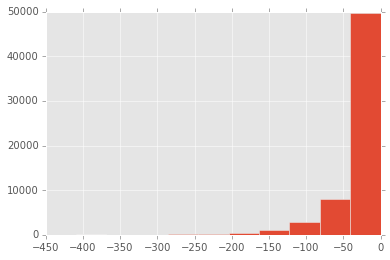

In [54]:
df['Permit_Length'].astype('timedelta64[D]').astype(int).hist()

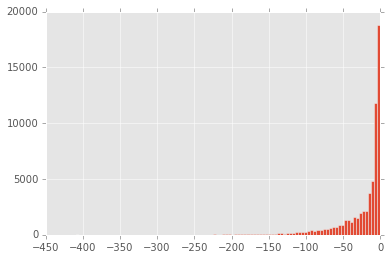

In [55]:
df['Permit_Length'].astype('timedelta64[D]').astype(int).hist(bins = 100)

In [56]:
df['Permit_Length'].astype('timedelta64[D]').astype(int).describe()

count    62372.000000
mean       -25.224075
std         37.503546
min       -409.000000
25%        -32.000000
50%         -9.000000
75%         -3.000000
max          0.000000
Name: Permit_Length, dtype: float64

Create fake sei distribution 

from yelp - rating + name 
from name - size = number of installations = collaboration type 
size = number of installations = number of employed people 
equipment technology - from data go thorugh each list and assign properties to the techonologies in use
total project time - assign uniformly over the resulting distribution 


data from 

In [96]:
#create dummies for companies
def company_dummy(row, templ, name):
    if not pd.isnull(row['Installer_Name_clear']):
        if templ.search(row['Installer_Name_clear']):
            val = name
        else:
            val = row['Installer_Name_clear']
    else:
        val = row['Installer_Name_clear']
    return val

In [222]:
regexes = [[r'SolarCity', 'SolarCity Corporation'], \
           [r'SunPower', 'SunPower Corporation'], \
          [r'Sunrun', 'Sunrun Installation Services, Inc'], \
           [r'Petersen\s+Dean', 'Petersen Dean Roofing & Solar Systems'], \
          [r'Semper Solaris', 'Semper Solaris Construction Inc'], \
          [r'Vivint', 'Vivint Solar Developer, LLC']]

for names in regexes:
    company_regex = names[0]
    replace_name = names[1]
    p = re.compile(company_regex, re.IGNORECASE)
    df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

/Users/wilfeli/anaconda/envs/aimacro/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# create index with rows that contain SolarCity
# just an example of indexing
index = (pd.notnull(df['Installer_Name'].str.contains('SolarCity')) & df['Installer_Name'].str.contains('SolarCity'))
df[index == True]['Installer_Name'].value_counts()

In [64]:
#see top 100 by number of installations
#for each check what equipment they are using - check top 2 in terms of number of installations 

In [224]:
top_names = df['Installer_Name_clear'].value_counts()[0:100]

In [109]:
df[df['Installer_Name_clear'] == top_names.index.values[0]]['Module_Model_1'].value_counts()[0:1]

KU265-6ZPA    8596
Name: Module_Model_1, dtype: int64

In [239]:
df[df['Installer_Name_clear'] == top_names.index.values[0]]['Inverter_Model_1'].value_counts()[0:2]

PVI-3.0-OUTD-S-US-Z-A (240V)    4746
PVI-3.6-OUTD-S-US-Z-A (240V)    2820
Name: Inverter_Model_1, dtype: int64

In [116]:
inverter_qn = df[df['Installer_Name_clear'] == top_names.index.values[0]]['Inverter_Quantity_1'].value_counts()

In [119]:
inverter_qn.index.values[0]

1.0

for each installer look at top 1 solar panel and top 2 inverters add them to general pool of all models that are used and general pool of inverters 

In [ ]:
pv_modules = set()
pv_modules_by_installer = {}
pv_manufacturers = set()
for installer in top_names.index.values:
    pv_modules.add(df[df['Installer_Name_clear'] == installer]['Module_Model_1'].value_counts()[0:1].index.values[0])
    pv_modules_by_installer[installer] = \
                    {'Module_Model_1':df[df['Installer_Name_clear'] == installer]['Module_Model_1'].value_counts()[0:1].index.values[0],
                    'Count':df[df['Installer_Name_clear'] == installer]['Module_Model_1'].value_counts()[0:1].values[0]}
    pv_manufacturers.add(df[df['Installer_Name_clear'] == installer]['Module_Manufacturer_1'].value_counts()[0:1].index.values[0])

    

In [128]:
print(pv_modules)

{'LG300N1C-B3', 'SE-F270KzD-3y', 'SE-F265KzD-3y', 'SW 285 Mono', 'CS6P-255P', 'SW 280 Mono Black', 'SW260 Mono', 'SPR-230NE-BLK-D', 'Q.PRO BFR - G3 260', 'HiS-S260RG(BK)', 'HiS-S280RG', 'SW 260 Poly', 'SNPM-GxB-300', 'REC275TP', 'HiS-S270RG', 'Q.PRO BFR - G3 265', 'KD265GX-LFB2', 'LLE-6M260', 'Q.PRO-G3 260', 'SW 280 Mono', 'HiS-M255RG', 'SPR-E20-327', 'JC250M-24/Bx', 'HSL60P6-PC-3-260W', 'SLA260P', 'STL-140', 'Q.PRO BFR G4 260', 'CS6P-260P', 'PM250M01_265', 'TSM-250PA05.05', 'TSM-250PD05.05', 'KU265-6ZPA', 'LG280S1C-B3', 'KU265-6MCA', 'LG305N1C-B3', 'CS6X-310P', 'HiS-M250MG', 'SE-F270KzC-2y', 'SW250 Poly', 'SPR-X21-345', 'SPR-327NE-WHT-D', 'TSM-260PA05A', 'UP-M265M-B', 'SNPM-GxB-360', 'LG275S1C-B3', 'HiS-S265RG', 'Q.PEAK BLK-G3 270', 'SE-F270KzD-4y', 'REC260PE', 'LG315N1C-G4', 'YL255P-29b', 'SE-F270CzC-4y'}


In [129]:
print(pv_manufacturers)

{'Renesola America', 'Hanwha SolarOne (Qidong)', 'Lifeline Energy International', 'YINGLI ENERGY', 'Yingli Energy (China)', 'Kyocera Solar', 'AU Optronics', 'Sun Edison', 'Hyundai Heavy Industries', 'Stion', 'Sunpreme', 'REC Solar', 'Trina Solar', 'LG Electronics Solar Cell Division', 'Canadian Solar', 'SolarWorld', 'Silfab', 'Hanwha Q-Cells', 'Upsolar', 'SunPower'}


In [228]:
len(pv_modules)

51

In [131]:
#read file with solar equipment
with open('../../Data/solar_equipment.json') as data_file:    
    pv_modules_data = json.load(data_file)

In [155]:
i = 0 
pv_modules_dataframe_raw = []
index_pv_modules_dataframe_raw = []
for pv_module in pv_modules_data['solar_modules']:
    pv_module['Efficiency'] = \
            float(pv_module["STC Power Rating"]) / float(pv_module["Length"]) / float(pv_module["Width"]) * 1000
    pv_module['Count'] = 0.0
    pv_modules_dataframe_raw.append([pv_module['Name'], \
                                     pv_module['Efficiency'], \
                                     pv_module['Count']
                                   ])
    index_pv_modules_dataframe_raw.append(i)
    i = i + 1

In [194]:
df_pv_modules = pd.DataFrame(data=pv_modules_dataframe_raw, \
                             index=index_pv_modules_dataframe_raw, columns = ['Name', 'Efficiency', 'Count'])

select records with installer name and top module for that installer, save records into separate database?

for each module find final number of uses, it will be its weight

In [229]:
for installer in top_names.index.values:
    name = pv_modules_by_installer[installer]['Module_Model_1']
    df_pv_modules.loc[df_pv_modules['Name'] == name, 'Count'] += pv_modules_by_installer[installer]['Count']  

In [198]:
np.average(a = df_pv_modules['Efficiency'], weights = df_pv_modules['Count'])

0.16743328524161546

In [199]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    V1 = np.sum(weights)
    variance = np.average((values-average)**2, weights=weights) * V1 / (V1-1) # Fast and numerically precise
    return (average, math.sqrt(variance))

In [267]:
efficiency_stats = weighted_avg_and_std(df_pv_modules['Efficiency'], df_pv_modules['Count'])

In [270]:
print(efficiency_stats)

0.167446568157


if it is +- one standard deviation - code as Standard
if higher - Cutting_Edge
if lower - Traditional

Name, Module_Name_1, Efficiency, Inverter_Name_1, Inverter_Type_1, Inverter_Name_2, Inverter_Type_2, Size, Rating, Interaction, Technology, LeadInProjectTime, Warranty

In [240]:
inverters_by_installer = {}
for installer in top_names.index.values:
    inverters_by_installer[installer] = \
        {
            'Inverter_Model_1':df[df['Installer_Name_clear'] == installer]['Inverter_Model_1'].value_counts()[0:2].index.values[0],
            'Inverter_Model_2':''
        }
    if len(df[df['Installer_Name_clear'] == installer]['Inverter_Model_1'].value_counts()[0:2].index.values) > 1:
        inverters_by_installer[installer]['Inverter_Model_2'] = df[df['Installer_Name_clear'] == installer]['Inverter_Model_1'].value_counts()[0:2].index.values[1]

In [247]:
inverters = set()
for installer in top_names.index.values:
    inverters.add(inverters_by_installer[installer]['Inverter_Model_1'])
    if (inverters_by_installer[installer]['Inverter_Model_2'] != ''):
        inverters.add(inverters_by_installer[installer]['Inverter_Model_2'])


In [254]:
#look at inverter in big database, check that module count is > 1 and see what is count of inverters, if 1 - central
# if >= number of modules - micro 
#in between - report type
inverter_types = {}
for inverter in inverters:
    row = df[df['Inverter_Model_1'] == inverter].iloc[0,:]
    if (row['Module_Quantity_1'] > 1.0):
        #check if it is micro
        if (row['Inverter_Quantity_1'] >= row['Module_Quantity_1']):
            #it is micro 
            inverter_types[inverter] = 'TechnologyInverterMicro'
        elif (row['Inverter_Quantity_1'] == 1):
            #it is central
            inverter_types[inverter] = 'TechnologyInverterCentral'
        else:
            print(inverter)

SE 10000A-US (240V)
M215-60-2LL-S2X-IG
YC500A (240V)


In [285]:
#add missing types
inverter_types['SE 10000A-US (240V)'] = 'TechnologyInverterCentral'
inverter_types['M215-60-2LL-S2X-IG'] = 'TechnologyInverterMicro'
inverter_types['YC500A (240V)'] = 'TechnologyInverterMicro'
inverter_types['M215-60-2LL-S2X'] = 'TechnologyInverterMicro'
inverter_types[''] = ''

In [283]:
print(inverter_types['M215-60-2LL-S2X'])

TechnologyInverterMicro


In [259]:
top_names[top_names.index == 'SolarCity Corporation'].values[0]

16824

In [292]:
df_installers_raw = []
row = []

for installer in top_names.index.values:
    row = [installer, \
           pv_modules_by_installer[installer]['Module_Model_1'], \
          df_pv_modules[df_pv_modules['Name'] == pv_modules_by_installer[installer]['Module_Model_1']]['Efficiency'].values[0],\
          inverters_by_installer[installer]['Inverter_Model_1'], \
          inverter_types[inverters_by_installer[installer]['Inverter_Model_1']], \
          inverters_by_installer[installer]['Inverter_Model_2'], \
          inverter_types[inverters_by_installer[installer]['Inverter_Model_2']], \
          top_names[top_names.index == installer].values[0], \
          4.0]
    
    #calculate interaction 
    if row[7] < 100:
        #assign as Collaborative
        row.append('Collaborative')
    elif row[7] < 1000:
        row.append('Moderate')
    else:
        row.append('Independent')
        
        

    #calculate equipment type
    if row[2] < (efficiency_stats[0] - efficiency_stats[1]):
        row.append('Traditional')
    elif ((row[2] >= (efficiency_stats[0] - efficiency_stats[1])) and (row[2] < (efficiency_stats[0] + efficiency_stats[1]))):
        row.append('Standard') 
    else:
        row.append('CuttingEdge')
    
    

    


['SunPower Corporation', 'SPR-230NE-BLK-D', 0.20837636758316028, 'PVI-3.0-OUTD-S-US-A (240V)', 'TechnologyInverterCentral', 'SB3000TL-US-22 (240V)', 'TechnologyInverterCentral', 1922, 4.0, 'Independent', 'CuttingEdge']
['Renova Energy Corp', 'SPR-E20-327', 0.20052565931242389, 'SB6000TL-US-22 (240V) (240V)', 'TechnologyInverterCentral', 'SB7700TL-US-22-240V', 'TechnologyInverterCentral', 570, 4.0, 'Moderate', 'CuttingEdge']
['Zero Energy Associates', 'SW250 Poly', 0.14910462671656699, 'M215-60-2LL-S2X-IG', 'TechnologyInverterMicro', 'M250-60-2LL-S2X (-ZC) (-NA) (240V)', 'TechnologyInverterMicro', 495, 4.0, 'Moderate', 'Traditional']
['Semper Solaris Construction Inc', 'SPR-X21-345', 0.21156376899934631, 'SB3800TL-US-22 (240V)', 'TechnologyInverterCentral', 'SB5000TL-US-22 (240V)', 'TechnologyInverterCentral', 444, 4.0, 'Moderate', 'CuttingEdge']
['Smart Energy USA', 'SPR-327NE-WHT-D', 0.20052565931242389, 'PVI-3.8-OUTD-S-US-A (240V)', 'TechnologyInverterCentral', 'PVI-5000-OUTD-US-A (2

In [213]:
df_pv_modules[df_pv_modules['Name'] == 'LG300N1C-B3']['Efficiency'].values[0]

0.18292682926829268

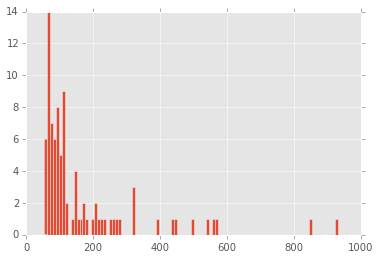

In [266]:
top_names[top_names < 1000].hist(bins=100)

In [ ]:
#edges 100 - 1000 